<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/03_class_%ED%86%B5%EA%B3%84%EC%99%80%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#generate related variables

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [3]:
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) +100
data2 = data1 +(10* randn(1000) + 50)

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


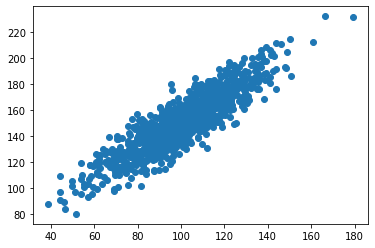

In [4]:
# summrarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

#plot
pyplot.scatter(data1,data2)

In [5]:
mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)

Qx = data1 - mean1
Qy = data2 - mean2 

Q = Qx*Qy

In [6]:
Q.shape
print(len(Q))

1000


In [7]:
r = sum(Q)/((len(Q)-1)* std1* std2)
print('correlation coeffifient :', r)

correlation coeffifient : 0.8885004089885196


In [10]:
import pandas as pd

rows = [int(i) for i in range(len(data1))]
s_d1 = pd.Series(data1, index = rows)
s_d2 = pd.Series(data2, index = rows)
clm = ['data1', 'data2']

d = pd.DataFrame(columns = clm)
d['data1'] = s_d1
d['data2'] = s_d2

d.corr()

,data1,data2
data1,1.000000,0.887612
data2,0.887612,1.000000


In [11]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr1,_ = pearsonr(data1, data2)
print('Pearsons correlation between data1 and data2: %.3f' % corr1)

Pearsons correlation between data1 and data2: 0.888


data1: mean=100.776 stdv=19.620
data2: mean=-50.503 stdv=21.959


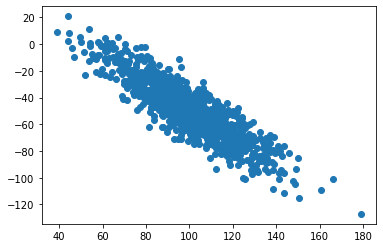

In [12]:
seed(1)

# prepare data
data1 = 20 *randn(1000) +100
data2 = -data1 + (10 * randn(1000)+ 50)

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot
pyplot.scatter(data1, data2)

In [14]:
mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)

Qx = data1 - mean1
Qy = data2 - mean2 

Q = Qx*Qy

In [15]:
r = sum(Q)/((len(Q)-1)* std1* std2)
print('correlation coeffifient :', r)

correlation coeffifient : -0.8841064512766241


In [16]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

# data[:,0] : sepal length in cm|n
# data[:,1] : sepal width in cm|n
# data[:,2] : petal length in cm|n
# data[:,3] : petal width in cm|n

(150, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


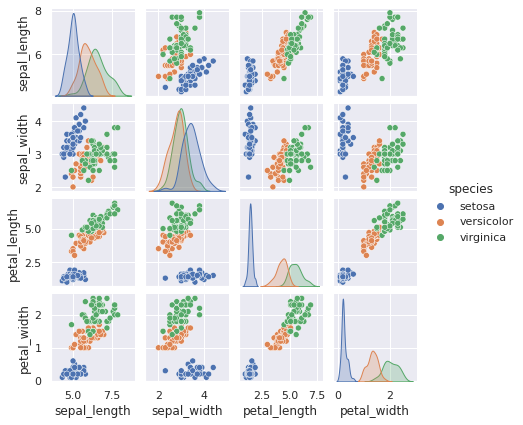

In [20]:
%matplotlib inline

import seaborn as sns
sns.set()

sns_iris = sns.load_dataset('iris')
sns.pairplot(sns_iris, hue = 'species', size =1.5)

In [22]:
data1 = data[:, 1]
data2 = data[:, 3]

mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)

Qx = data1 - mean1
Qy = data2 - mean2

Q = Qx * Qy

r = sum(Q)/((len(Q)-1)*std1*std2)

print('correlation coefficient:', r)

correlation coefficient: -0.3685831535601737


In [23]:
data1 = data[:, 2]
data2 = data[:, 3]

mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)

Qx = data1 - mean1
Qy = data2 - mean2

Q = Qx * Qy

r = sum(Q)/((len(Q)-1)*std1*std2)

print('correlation coefficient:', r)

correlation coefficient: 0.9693276155061709


In [24]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr1,_ = pearsonr(data[:,2], data[:,3])
print('Pearsons correlation between data2 and data3: %.3f' % corr1)
corr1,_ = pearsonr(data[:,1], data[:,3])
print('Pearsons correlation between data1 and data3: %.3f' % corr1)

Pearsons correlation between data2 and data3: 0.963
Pearsons correlation between data1 and data3: -0.366


## data Sample : housing

In [25]:
import pandas as pd

In [30]:
# housing = pd.read_csv('C:/Users/jhjh3/AI/MLdata/housing.csv')
housing = pd.read_csv('drive/MyDrive/housing.csv')

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
Unnamed: 0            0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ec70a350>,
      dtype=object)

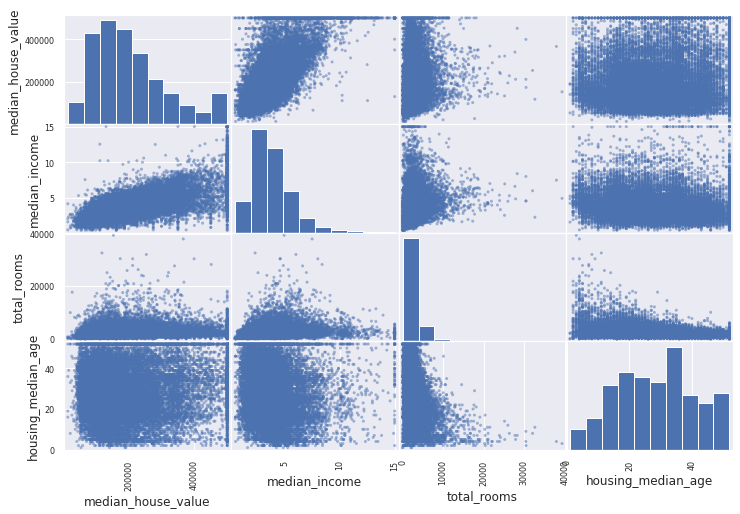

In [33]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))